In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=57832


In [2]:
H = create_hamiltonian(system), 0.1

In [3]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

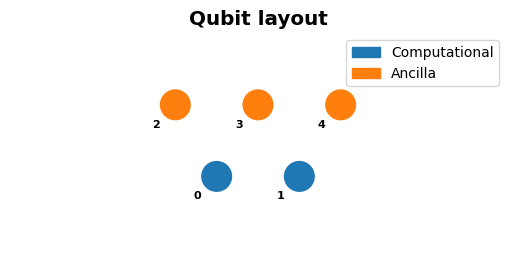

In [4]:
qubits.show_layout()

In [5]:
theta_opt = np.load("losses_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=200, n_grad=10, theta_init=theta_opt)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=47439


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        170.72971510887146 
        Armijo calculation time: 
        14.960310935974121 
        Total grad descend time: 
        3:5.69


In [7]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [8]:
theta_opt

array([-2.58854812e-01,  5.94851086e-02,  1.00000000e-01,  1.00000000e-01,
        1.00000000e-01,  7.81792220e-02,  1.30412921e-01,  1.02738966e-01,
        3.27626822e-01,  1.06510161e-01, -3.14451999e-01, -5.05764927e-02,
        9.98640760e-02,  1.00522142e-01,  1.00794218e-01, -1.38997762e-01,
        1.05729760e-01,  7.65911360e-02,  1.00579260e-01,  1.01702660e-01,
        1.00170837e-01,  4.54021014e-02,  2.43576175e-01,  9.47261089e-02,
        1.74436051e-01,  9.84305913e-02,  1.28487643e-01,  2.69265264e-01,
        1.00568117e-01,  1.02888358e-01,  9.59288992e-02,  3.84215846e-02,
        8.23716381e-02, -1.25814681e-01,  8.86391947e-02,  7.06891033e-02,
        1.00855646e-01,  5.24351703e-02, -4.92426034e-01,  8.59559466e-02,
        1.05221409e-01,  1.01437493e-01, -5.64321314e-02, -6.59074124e-02,
        1.04076433e-01,  1.04288803e-01,  9.67531910e-02,  1.10455820e-01,
       -5.80930615e-02, -9.32118448e-02,  1.01947458e-01,  1.05288815e-01,
        1.01667966e-01,  

rho_rand_haar: seed=25065


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

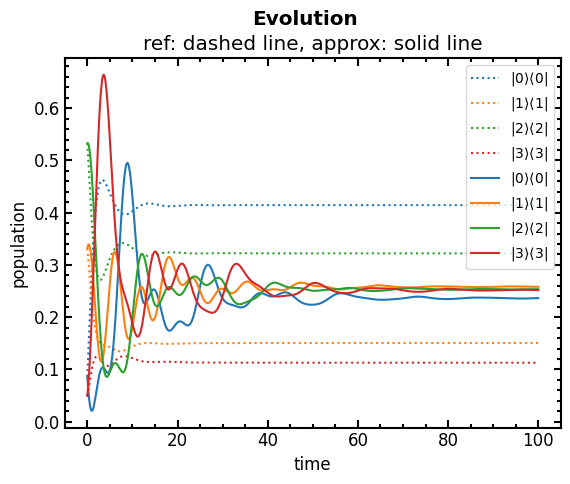

In [9]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(1000, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=1000, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

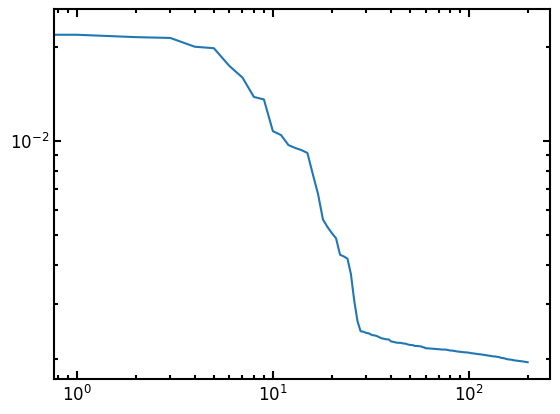

In [10]:
plt.loglog(errors)